# Estadística Descriptiva

## Objetivos de la estadística descriptiva
- Resumen de datos
- Viusalización de datos
- Identificación de valores atípicos
- Exploración de relaciones


## Tipos de medidas en estadística descriptiva

- Variables Numéricas:
  - 1 Variables
    - Medidas de centralización:
      - Media
      - Mediana
      - Moda
      - Visualizaciones (media, moda, mediana): histogramas y boxplot
    - Medidas de dispersión
      - Varianza
      - Desviación Estándar
    - Relativas 
      - Percentiles
  - 2 Variables
    - Correlación 
    - Visualizacion: Heatmap


- Variables categóricas
  - 1 variable: 
    - Medidas de centralización:
      - Moda
      - Visualizacion moda: countplot
  - 2 variables: 
    - tablas de contingencia (cross tab), countplot

In [5]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("./files/bank-additional-clean-nonulls.csv", index_col = 0)

df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857000,4.4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,noviembre,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,57.000000,3.603174,4.8
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,37.000000,4.857000,7.0
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,40.000000,3.595488,2.8
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,56.000000,3.602722,5.8


# VARIABLES NUMÉRICAS

# Medidas de Centralización




In [7]:
media = df["age"].mean()
mediana = df["age"].median()
moda = df["age"].mode()

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 39.98804013098277
Mediana: 39.95594581951044
Moda: 0    31.0
dtype: float64


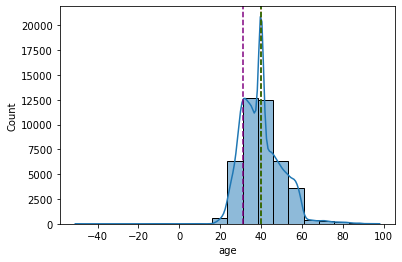

In [15]:
sns.histplot(df["age"], bins = 20, kde = True);
plt.axvline(media, color = "red", linestyle = "--", label = f'Media: {media}');
plt.axvline(mediana, color = "green", linestyle = "--", label = f'Mediana: {mediana}');
plt.axvline(moda[0], color = "purple", linestyle = "--", label = f'Moda: {moda[0]}');

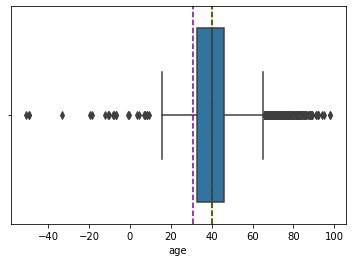

In [17]:
sns.boxplot(x = df["age"]);
plt.axvline(media, color = "red", linestyle = "--", label = f'Media: {media}');
plt.axvline(mediana, color = "green", linestyle = "--", label = f'Mediana: {mediana}');
plt.axvline(moda[0], color = "purple", linestyle = "--", label = f'Moda: {moda[0]}');

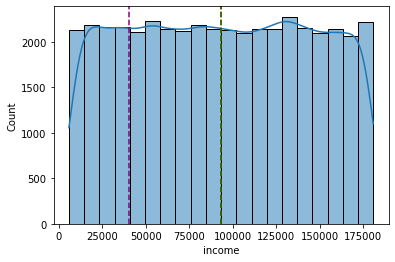

In [16]:
media_inc = df["income"].mean()
mediana_icn = df["income"].median()
moda_inc = df["income"].mode()

sns.histplot(df["income"], bins = 20, kde = True);
plt.axvline(media_inc, color = "red", linestyle = "--", label = f'Media: {media_inc}');
plt.axvline(mediana_icn, color = "green", linestyle = "--", label = f'Mediana: {mediana_icn}');
plt.axvline(moda_inc[0], color = "purple", linestyle = "--", label = f'Moda: {moda_inc[0]}');   

# Medidas de Dispersión



In [ ]:
## Varianza:  dispersion de los datos respecto a la media
## Desvianción estándar: es la raiz cuadrada de la varianza, mide la dispersión de los datos respecto a la media
## rango: diferencia entre el valor máximo y el valor mínimo

In [19]:
varianza_ingresos = df["income"].var()
desviacion_estandar_ingresos = df["income"].std()   

print(f"Varianza: {varianza_ingresos}")
print(f"media: {media_inc}")
print(f"Desviación estándar: {desviacion_estandar_ingresos}")

Varianza: 2550079937.1979256
media: 93241.20006976744
Desviación estándar: 50498.31618180873


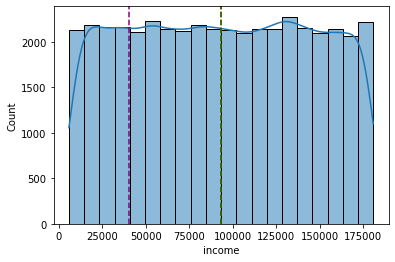

In [21]:
sns.histplot(df["income"], bins = 20, kde = True);
plt.axvline(media_inc, color = "red", linestyle = "--", label = f'Media: {media_inc}');
plt.axvline(mediana_icn, color = "green", linestyle = "--", label = f'Mediana: {mediana_icn}');
plt.axvline(moda_inc[0], color = "purple", linestyle = "--", label = f'Moda: {moda_inc[0]}');   
## ver si puede representar la desviación estándar

# Medidas de Posición Relativas: Percentiles



In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,43000.0,93241.200070,50498.316182,5841.000000,49610.00000,93050.500000,136744.50000,180802.000000
kidhome,43000.0,1.004791,0.815913,0.000000,0.00000,1.000000,2.00000,2.000000
teenhome,43000.0,0.998605,0.815983,0.000000,0.00000,1.000000,2.00000,2.000000
numwebvisitsmonth,43000.0,16.589698,9.239205,1.000000,9.00000,17.000000,25.00000,32.000000
duration,43000.0,257.739279,258.666033,0.000000,102.00000,179.000000,319.00000,4918.000000
campaign,43000.0,2.567233,2.772294,1.000000,1.00000,2.000000,3.00000,56.000000
previous,43000.0,0.174023,0.497366,0.000000,0.00000,0.000000,0.00000,7.000000
empvarrate,43000.0,0.077128,1.573898,-3.400000,-1.80000,1.100000,1.40000,1.400000
conspriceidx,43000.0,93.574219,0.576365,92.201000,93.07500,93.574219,93.99400,94.767000
consconfidx,43000.0,-40.509049,4.637186,-50.800000,-42.70000,-41.800000,-36.40000,-26.900000


In [28]:
percentiles = np.percentile(df["income"], [25, 50, 75])
percentiles

print(f'percentil 25: {percentiles[0]}')

percentil 25: 49610.0


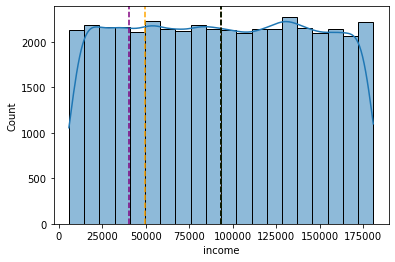

In [30]:
sns.histplot(df["income"], bins = 20, kde = True);
plt.axvline(media_inc, color = "red", linestyle = "--", label = f'Media: {media_inc}');
plt.axvline(mediana_icn, color = "green", linestyle = "--", label = f'Mediana: {mediana_icn}');
plt.axvline(moda_inc[0], color = "purple", linestyle = "--", label = f'Moda: {moda_inc[0]}');   
plt.axvline(percentiles[0], color = "orange", linestyle = "--", label = f'Percentil 25: {percentiles[0]}');
plt.axvline(percentiles[1], color = "black", linestyle = "--", label = f'Percentil 50: {percentiles[1]}');

## ¿Qué se ve mejor en un histograma?:

- La forma de la distribución (simétrica, sesgada, etc.).
- Las frecuencias (densidad de datos).
- Presencia de modas (picos múltiples).
- Extremos y dispersión general.

## Qué se ve mejor en un boxplot?:

- La mediana y el rango intercuartílico (IQR).
- Los bigotes (valores máximos y mínimos esperados).
- Valores atípicos (outliers).
- Comparaciones entre grupos.


# Medidas Estadísticas para varias variables a la vez

In [ ]:
df.describe().T

# Medidas de Correlación: Relación entre 2 Variables

In [ ]:
## matriz de correlación
df_numeric = df.select_dtypes(include = [np.number]).columns.to_list()
matriz_correlacion = df[df_numeric].corr()
matriz_correlacion

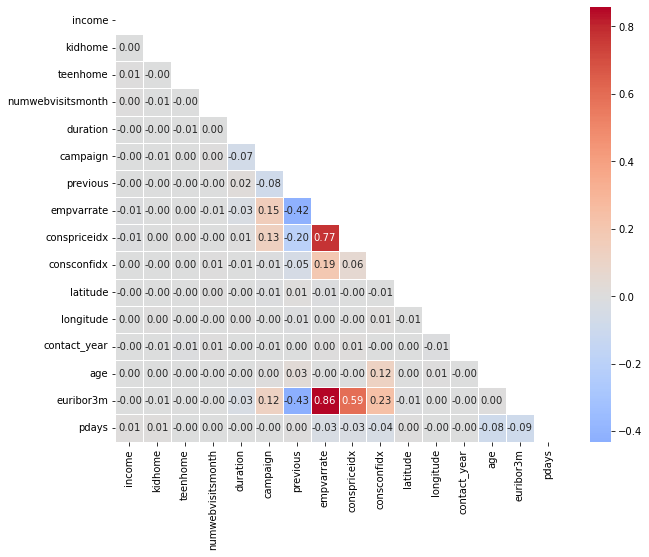

In [35]:
plt.figure(figsize = (10, 8))
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool)); 
sns.heatmap(matriz_correlacion, annot = True, cmap = "coolwarm", mask=mask, linewidths=.5, fmt= '.2f', center = 0);

Métodos para hacer la correlación: utilizar un gráfico de dipersión
- Pearson (por defecto): relación lineal entre dos variables (un valor aumenta, el otro aumente y viceversa), 
- Kendall: rango de variables que tengan un orden 
- Spearman:  monotónica

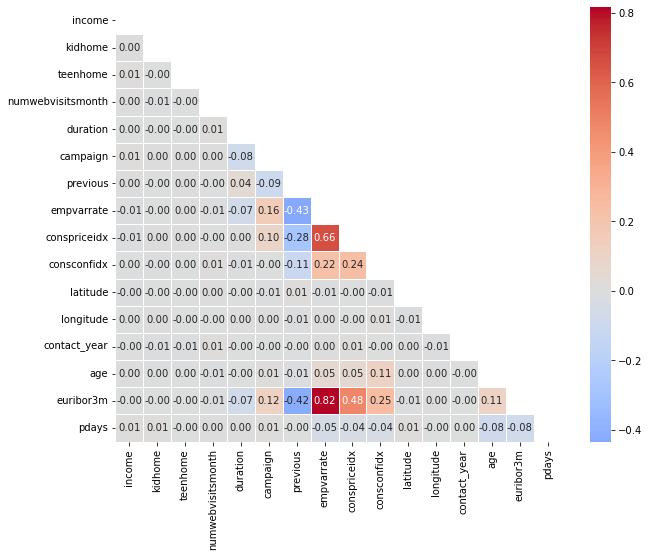

In [37]:
matriz_correlacion_2 = df[df_numeric].corr(method='spearman')
matriz_correlacion_2
plt.figure(figsize = (10, 8))
mask = np.triu(np.ones_like(matriz_correlacion_2, dtype=bool)); 
sns.heatmap(matriz_correlacion_2, annot = True, cmap = "coolwarm", mask=mask, linewidths=.5, fmt= '.2f', center = 0);

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## VARIABLES CATEGÓRICAS

In [ ]:
## Frecuencias relativas: es el porcentaje de veces que se repite un valor pero respecto al total de valores
## Frecuencia absoluta: número de veces que se repite un valor

frecuencia_absoluta = df["marital"].value_counts()
frecuencia_relativa = df["marital"].value_counts(normalize = True)*100

print(frecuencia_absoluta)
print(frecuencia_relativa)

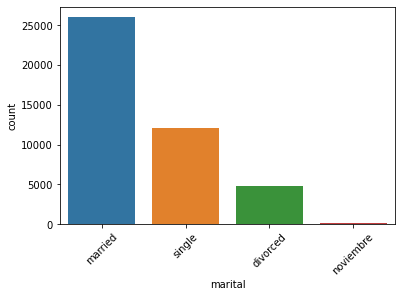

In [42]:
orden = df["marital"].value_counts().index
sns.countplot(x = "marital", data=df, order = orden);
plt.xticks(rotation = 45);

## Relación entre variables categóricas: Tabla de contingencia

In [39]:
tabla = pd.crosstab(df["marital"], df["education"], normalize=True)*100
tabla

education,Unknown,basic 4y,basic 6y,basic 9y,high school,illiterate,professional course,university degree
marital,,,,,,,,
divorced,0.444186,1.200000,0.441860,1.376744,2.883721,0.004651,1.602326,3.234884
married,2.576744,7.827907,4.286047,10.072093,12.493023,0.034884,7.662791,15.509302
noviembre,0.020930,0.013953,0.016279,0.020930,0.034884,0.000000,0.016279,0.074419
single,1.160465,1.088372,0.804651,3.202326,7.669767,0.002326,3.455814,10.767442


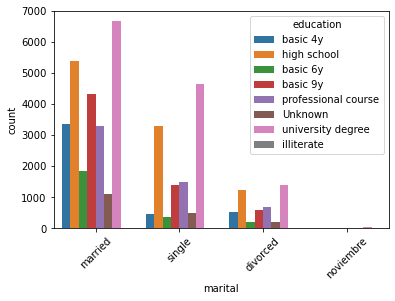

In [41]:
orden_education = df["marital"].value_counts().index
sns.countplot(x = "marital", data=df, order = orden_education, hue='education');
plt.xticks(rotation = 45);